In [113]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# From Scratch

----------------------------------------------------------------------------------------------------
Weights:
 [[1.05238648]
 [0.89743227]],
Intercept: -0.9526817053368783
----------------------------------------------------------------------------------------------------
Confusion Matrix : 
 [[82, 16], [2, 100]]
----------------------------------------------------------------------------------------------------
Accuracy: 91.00%
----------------------------------------------------------------------------------------------------


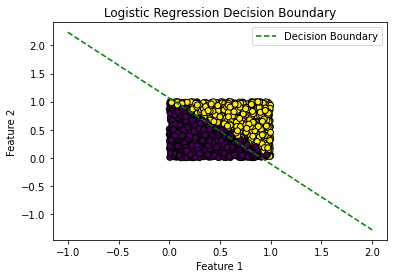

In [152]:
# Parameters
weights = 0
bias =0
# hyperparameters
num_iterations=2000
learning_rate=0.01

def initialize_parameters(num_features):
    global weights 
    weights = np.zeros((num_features, 1))
    global bias 
    bias=0
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def cost_(y, y_pred):
    n=len(y)
    cost= -(1/n)*np.sum(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))
    return cost
def gradient_descent( X, y, y_pred):
    global learning_rate
    n = len(y)
    dw = (1/n) * np.dot(X.T, (y_pred - y))
    db = (1/n) * np.sum(y_pred - y)
    global weights 
    global bias 
    weights -= learning_rate * dw
    # print("------weights-----",weights)
    bias -= learning_rate * db
    # print("------bias-----",bias)
    # print("---------------------------------------------------------------")

def fit(X, y):
    num_features = X.shape[1]
    initialize_parameters(num_features)
    global num_iterations
    for iteration in range(num_iterations):
        z = np.dot(X, weights) + bias
        y_pred = sigmoid(z)
        cost = cost_(y, y_pred)
        if iteration % 100 == 0:
            pass
            # print(f"Iteration {iteration}, Cost: {cost}")
        gradient_descent(X, y, y_pred)

def predict(X):
    global weights 
    global bias 
    z = np.dot(X, weights) + bias
    y_pred = sigmoid(z)
    return (y_pred >= 0.5).astype(int)

def confusion__matrix(y_true, y_pred):
    tp, tn, fp, fn = 0, 0, 0, 0
    for true, pred in zip(y_true, y_pred):
        if true == 1 and pred == 1:
            tp += 1
        elif true == 0 and pred == 0:
            tn += 1
        elif true == 0 and pred == 1:
            fp += 1
        elif true == 1 and pred == 0:
            fn += 1
    return [[tp,fp ], [fn,tn]]

# random data set
np.random.seed(42)
X_train = np.random.rand(2000, 2)
y_train = (X_train[:, 0]**(1.2) + X_train[:, 1] > 1).astype(int).reshape(-1, 1)
X_test = np.random.rand(200, 2)
y_test = (X_test[:, 0] + X_test[:, 1]**(1.2) > 1).astype(int).reshape(-1, 1)

X=np.concatenate((X_train,X_test),axis=0)
y=np.concatenate((y_train,y_test),axis=0)

# fitting the training set
fit(X_train, y_train)

# predicting values of test set using optimal weights after all iterations
y_predictions = predict(X_test)

# summary of model
print("-"*100)
coef = weights
intercept = bias
print(f"Weights:\n {coef},\nIntercept: {intercept}")
print("-"*100)
# finding the Confusion Matrix
cm=confusion__matrix(y_test, y_predictions)
print(f"Confusion Matrix : \n {cm}")
print("-"*100)
# accuracy=(tp+fp)/total
accuracy=(cm[0][0]+cm[1][1])/np.sum(cm)
print(f"Accuracy: {accuracy*100:.2f}%")
print("-"*100)




plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
xx = np.linspace(x_min, x_max, 100)
yy = -(coef[0] / coef[1]) * xx - (intercept / coef[1])

plt.plot(xx, yy, c='green', linestyle='--', label='Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.legend()

plt.show()



# Using Sci-kit Learn

/home/sysadm/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


----------------------------------------------------------------------------------------------------
Weights: [11.1748428 10.6854584],
Intercept: -11.420951923018754
----------------------------------------------------------------------------------------------------
Confusion Matrix : 
 [[111   5]
 [  2  82]]
----------------------------------------------------------------------------------------------------
Accuracy: 96.50%
----------------------------------------------------------------------------------------------------


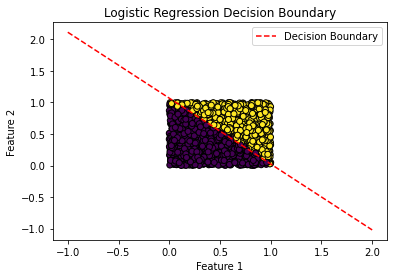

<Figure size 720x576 with 0 Axes>

In [164]:
# Initialize logistic regression model
model = LogisticRegression(random_state=42)

# Train the model
lr=model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Summary of the model
print("-"*100)
# weights and bias
coef = model.coef_[0]
intercept = model.intercept_[0]
print(f"Weights: {coef},\nIntercept: {intercept}")
print("-"*100)
# find confusion mqatrix
cm = confusion_matrix(y_test, predictions)
print(f"Confusion Matrix : \n {cm}")
print("-"*100)
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy*100:.2f}%")
print("-"*100)


# plot data
plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='k')

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
xx = np.linspace(x_min, x_max, 100)
yy = -(coef[0] / coef[1]) * xx - (intercept / coef[1])

# plot decision boundary
plt.plot(xx, yy, c='red', linestyle='--', label='Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.figure(figsize=(10, 8))


plt.show()